Challenge Set 5  
Topic: Classification  
Date: August 1, 2016  
Name: Allison Schlissel  
Worked with: Graham  

## Q1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [15]:
import pandas as pd
import csv
import numpy as np
import re

In [17]:
df_congress = pd.read_csv('house-votes-84.txt')
df_congress.head(2)

,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8,republican.
0,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican.
1,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat.


In [18]:
#string cleaning

df_congress.rename(columns={'republican.': 'republican'}, inplace=True) 
df_congress['republican'] = df_congress['republican'].apply(lambda x: re.sub('\.', '', x).strip())
df_congress['republican'].value_counts()

democrat      267
republican    167
Name: republican, dtype: int64

In [19]:
# more string cleaning
df_congress.rename(columns=lambda x: re.sub('\.','',x), inplace=True)
df_congress.rename(columns={'?': 'y9'}, inplace=True) 
df_congress.head(2)

,n,y,n1,y1,y2,y3,n2,n3,n4,y4,y9,y5,y6,y7,n5,y8,republican
0,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
1,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat


In [20]:
df_congress = df_congress.replace(['y', 'n'], [1, 0])
df_congress.head(2)

,n,y,n1,y1,y2,y3,n2,n3,n4,y4,y9,y5,y6,y7,n5,y8,republican
0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?,republican
1,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0,democrat


In [21]:
df_congress = df_congress.replace('?', np.NaN)
df_congress.head(2)

,n,y,n1,y1,y2,y3,n2,n3,n4,y4,y9,y5,y6,y7,n5,y8,republican
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,republican
1,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,democrat


In [22]:
df_congress = df_congress.fillna(df_congress.mean())
df_congress.head(2)

,n,y,n1,y1,y2,y3,n2,n3,n4,y4,y9,y5,y6,y7,n5,y8,republican
0,0.000000,1.0,0.0,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.812121,republican
1,0.443128,1.0,1.0,0.416076,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,democrat


## Q2

Split the data into a test and training set. Use this function:

In [23]:
from sklearn.cross_validation import train_test_split

import sklearn
from sklearn import cross_validation as cv
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from patsy import dmatrices

In [24]:
y,X = dmatrices('republican ~ n + y + n1 + y1 + y2 + y3 + n2 + n3 + n4 + y4 + y9 + y5 + y6 + y7 + n5 + y8',
                data = df_congress, return_type='dataframe')

In [25]:
y.head(2)

,republican[democrat],republican[republican]
0,0.0,1.0
1,1.0,0.0


In [26]:
y = y['republican[republican]']
y.shape

(434,)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 333)
#test

## Q3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

max_accuracy = {}
for i in range (1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x_train, y_train)
    acc = accuracy_score(y_test, model.predict(x_test))
    max_accuracy[i] = acc

max(max_accuracy, key=max_accuracy.get)

2

## Q4

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [29]:
df_congress_new = pd.read_csv('house-votes-84.txt')
df_congress_new = df_congress_new.replace(['y','n'], [1,0,])
df_congress_new = df_congress_new.replace('?', np.NaN)
df_congress_new = df_congress_new.fillna(df_congress_new.mean())
df_congress_new.rename(columns=lambda x: re.sub('\.','',x), inplace=True)
df_congress_new['republican'] = df_congress_new['republican'].apply(lambda x: re.sub('\.', '', x).strip())
df_congress_new.head(2)

,n,y,n1,y1,y2,y3,n2,n3,n4,y4,?,y5,y6,y7,n5,y8,republican
0,0.000000,1.0,0.0,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.812121,republican
1,0.443128,1.0,1.0,0.416076,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,democrat


In [30]:
y = df_congress['republican']

In [31]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logistics = LogisticRegression()
logistics.fit(x_train, y_train)
acc = accuracy_score(y_test, logistics.predict(x_test))
acc

0.95402298850574707

## Q5

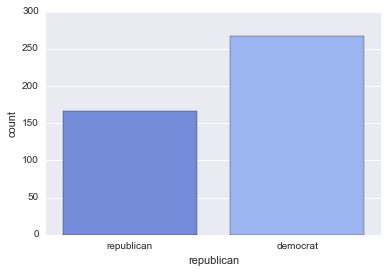

In [32]:
import seaborn as sns
sns.set(style="darkgrid")
sns.set_palette(sns.color_palette("coolwarm", 7))
import matplotlib.pyplot as plt
%matplotlib inline

#dems = len(df_congress[df_congress.republican=='republican'])
#pubs = len(df_congress[df_congress.republican=='democrat'])

ax = sns.countplot(x="republican", data=df_congress)

In [33]:
logistics.fit(X, y)
logistics.predict(X)

array(['republican', 'democrat', 'democrat', 'democrat', 'democrat',
       'republican', 'republican', 'republican', 'democrat', 'republican',
       'republican', 'democrat', 'democrat', 'republican', 'republican',
       'democrat', 'democrat', 'republican', 'democrat', 'democrat',
       'democrat', 'democrat', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'republican', 'democrat', 'republican',
       'democrat', 'democrat', 'republican', 'democrat', 'republican',
       'republican', 'republican', 'republican', 'democrat', 'democrat',
       'democrat', 'democrat', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'democrat', 'republican', 'democrat',
       'republican', 'democrat', 'republican', 'democrat', 'republican',
       'republican', 'republican', 'republican', 'republican', 'democrat',
       'republican', 'democrat', 'democrat', 'democrat', 'republican',
       'republican', 'republican', 'democrat', 'democrat', 'democrat',
      

In [34]:
r_acc = accuracy_score(y_test, ['republican' for i in range(len(y_test))])
r_list = [r_acc for i in range(1, 21)]
print r_list

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


/Users/allison18paige/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:177: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [35]:
d_acc = accuracy_score(y_test, ['democrat' for i in range(len(y_test))])
d_list = [d_acc for i in range(1, 21)]
print d_list

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [36]:
y.head(2)

0    republican
1      democrat
Name: republican, dtype: object

## Q6

In [37]:
max_accuracy.values()

[0.91954022988505746,
 0.93103448275862066,
 0.93103448275862066,
 0.93103448275862066,
 0.91954022988505746,
 0.90804597701149425,
 0.90804597701149425,
 0.90804597701149425,
 0.89655172413793105,
 0.89655172413793105,
 0.89655172413793105,
 0.89655172413793105,
 0.89655172413793105,
 0.89655172413793105,
 0.89655172413793105,
 0.89655172413793105,
 0.89655172413793105,
 0.89655172413793105,
 0.90804597701149425,
 0.90804597701149425]

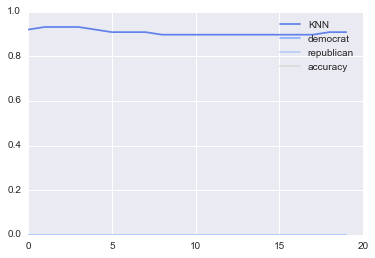

In [38]:
plt.plot(max_accuracy.values(), label='KNN')
plt.plot(d_list, label = 'democrat')
plt.plot(r_list, label = 'republican')
plt.plot(acc, label = 'accuracy')
plt.legend()

## Q7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:  
from sklearn.learning_curve import learning_curve This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:  
train_cv_err = np.mean(train_err, axis=1) test_cv_err = np.mean(ts_err, axis=1)  
Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).  
Draw the learning curve for KNN with the best k value as well.

In [39]:
from sklearn.learning_curve import learning_curve
from sklearn.svm import SVC

In [40]:
train_sizes, train_scores, test_scores = learning_curve(logistics, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

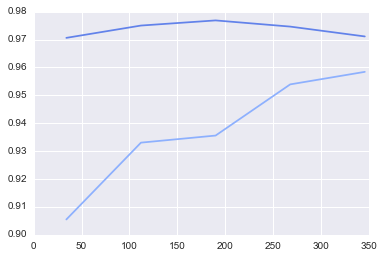

In [41]:
plt.plot(train_sizes, train_scores_mean)
plt.plot(train_sizes, test_scores_mean)
plt.show()

In [42]:
train_sizes, train_scores, test_scores = learning_curve(knn, X, y)
train_scores_mean_2 = np.mean(train_scores, axis=1)
test_scores_mean_2 = np.mean(test_scores, axis=1)

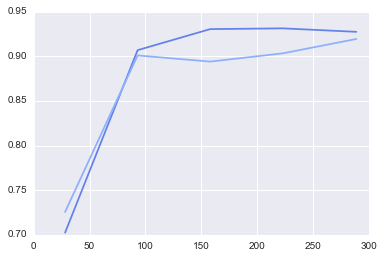

In [43]:
plt.plot(train_sizes, train_scores_mean_2)
plt.plot(train_sizes, test_scores_mean_2)
plt.show()

## Q8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

In [44]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
acc_gaus = accuracy_score(y_test, gaussian.predict(x_test))
acc_gaus

0.91954022988505746

In [45]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
acc_svc = accuracy_score(y_test, svc.predict(x_test))
acc_svc

0.90804597701149425

In [46]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
acc_decision_tree = accuracy_score(y_test, decision_tree.predict(x_test))
acc_decision_tree

0.91954022988505746

In [47]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
acc_random_forest = accuracy_score(y_test, random_forest.predict(x_test))
acc_random_forest

0.91954022988505746

## Q9

In [48]:
from sklearn.cross_validation import cross_val_score

In [49]:
np.mean(cross_val_score(gaussian, X, y))

0.93084291187739465

In [50]:
np.mean(cross_val_score(svc, X, y))

0.95387931034482765

In [51]:
np.mean(cross_val_score(decision_tree, X, y))

0.94926564495530019

In [52]:
np.mean(cross_val_score(random_forest, X, y))

0.96998722860791819

## Q10

In [53]:
df_votes = pd.read_csv('house-votes-84.txt')

In [54]:
df_votes.rename(columns=lambda x: re.sub('\.','',x), inplace=True)
df_votes.rename(columns={'?': 'y9'}, inplace=True) 
df_votes.head(2)

,n,y,n1,y1,y2,y3,n2,n3,n4,y4,y9,y5,y6,y7,n5,y8,republican
0,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican.
1,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat.


In [55]:
df_votes= df_votes.replace(['y', 'n'], [1, 0])
df_votes = df_votes.replace('?', np.NaN)
df_votes.head(2)

,n,y,n1,y1,y2,y3,n2,n3,n4,y4,y9,y5,y6,y7,n5,y8,republican
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,republican.
1,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,democrat.


In [56]:
df_votes = df_votes.fillna(df_votes.mode().iloc[0])
df_votes = df_votes.drop('republican', 1)
df_votes.head(2)

,n,y,n1,y1,y2,y3,n2,n3,n4,y4,y9,y5,y6,y7,n5,y8
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [57]:
from patsy import dmatrix

X = dmatrix('n2 + n1 + y1 + y2 + y3 + n3 + n4 + y4 + y9 + y5 + y6 + y7 + n5 + y8',
                data = df_votes, return_type='dataframe')

y = df_votes['y']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 333)
logistics = LogisticRegression()
logistics.fit(x_train, y_train)
acc = accuracy_score(y_test, logistics.predict(x_test))
acc

0.67816091954022983